**Importing the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the dataset**

In [49]:
hr_df=pd.read_csv('hr_dataset.csv')
hr_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


**Checking for misssing values**

In [27]:
hr_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

**Filling th missing values**

In [28]:
for i in hr_df.columns:
    temp_mean=hr_df[i].mode()
    hr_df[i].fillna(temp_mean.values[0],inplace=True)

In [29]:
hr_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

**Dropping the id column**

In [51]:
hr_df.drop(['employee_id','awards_won?'],inplace=True,axis=1)
hr_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,-0.484781,0.228000,1.380524,0.762071,1.356878,-1.173748,-0.305122
1,Operations,region_22,Bachelor's,m,other,-0.484781,-0.564724,1.380524,-0.246487,-0.736986,-0.091947,-0.305122
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,-0.484781,0.087051,-0.311606,0.561785,-0.736986,-1.058971,-0.305122
3,Sales & Marketing,region_23,Bachelor's,m,other,2.053010,0.723268,-1.752567,1.101233,-0.736986,-1.058971,-0.305122
4,Technology,region_26,Bachelor's,m,other,-0.484781,1.308914,-0.311606,-1.141600,-0.736986,0.821223,-0.305122
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,-0.484781,1.549423,-0.311606,1.922634,-0.736986,1.102713,-0.305122
54804,Operations,region_27,Master's & above,f,other,-0.484781,0.488279,-1.069809,0.333625,-0.736986,-0.443726,-0.305122
54805,Analytics,region_1,Bachelor's,m,other,-0.484781,-1.171721,1.380524,-0.635348,1.356878,1.155371,-0.305122
54806,Sales & Marketing,region_9,NaN,m,sourcing,-0.484781,-0.753965,-1.752567,-1.141600,-0.736986,-1.675313,-0.305122


In [31]:
hr_df['previous_year_rating'].astype(dtype='int')

0        5
1        5
2        3
3        1
4        3
        ..
54803    3
54804    2
54805    5
54806    1
54807    1
Name: previous_year_rating, Length: 54808, dtype: int32

**Dividing categorical and numerical column**

In [47]:
cat_col=hr_df.select_dtypes(include='object').columns
num_col=hr_df.select_dtypes(exclude='object').columns
cat_col,num_col

(Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object'),
 Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
        'KPIs_met >80%', 'avg_training_score', 'is_promoted'],
       dtype='object'))

**Creating data frame for every categorical column**

In [33]:
import os
try:
    main_path=os.getcwd()
    new_folder_name='hr_cat_df'
    cat_dir_path=os.path.join(main_path,new_folder_name)
    os.makedirs(cat_dir_path)
except Exception as e:
    print(e)
for i in cat_col:
    val_count=hr_df[i].value_counts()
    labels=val_count.keys()
    count=val_count.values
    cat_dfs=pd.DataFrame(zip(labels,count),columns=['labels','count'])
    cat_dfs.to_csv(f'{cat_dir_path}\{i}.csv')

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\DELL\\OneDrive\\Documents\\NareshIT\\EDA\\End-to-End EDA\\Hr data analysis\\hr_cat_df'


**Plotting bar graph for categorical dataframes**

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\DELL\\OneDrive\\Documents\\NareshIT\\EDA\\End-to-End EDA\\Hr data analysis\\hr_cat_bar'


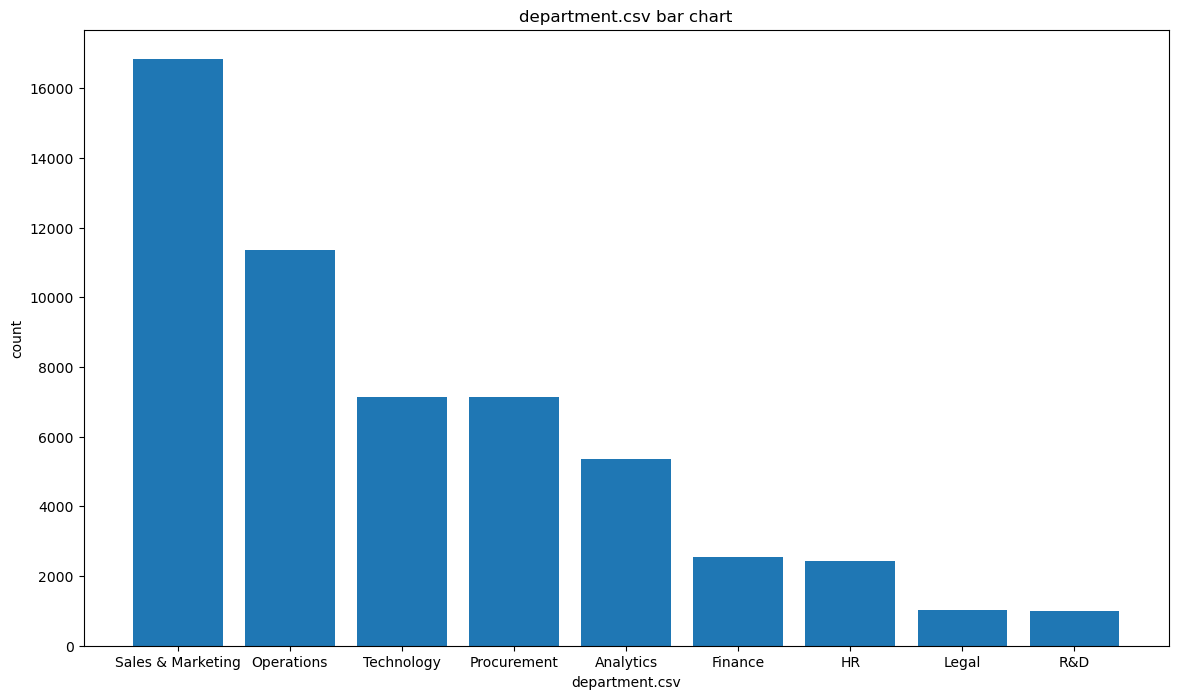

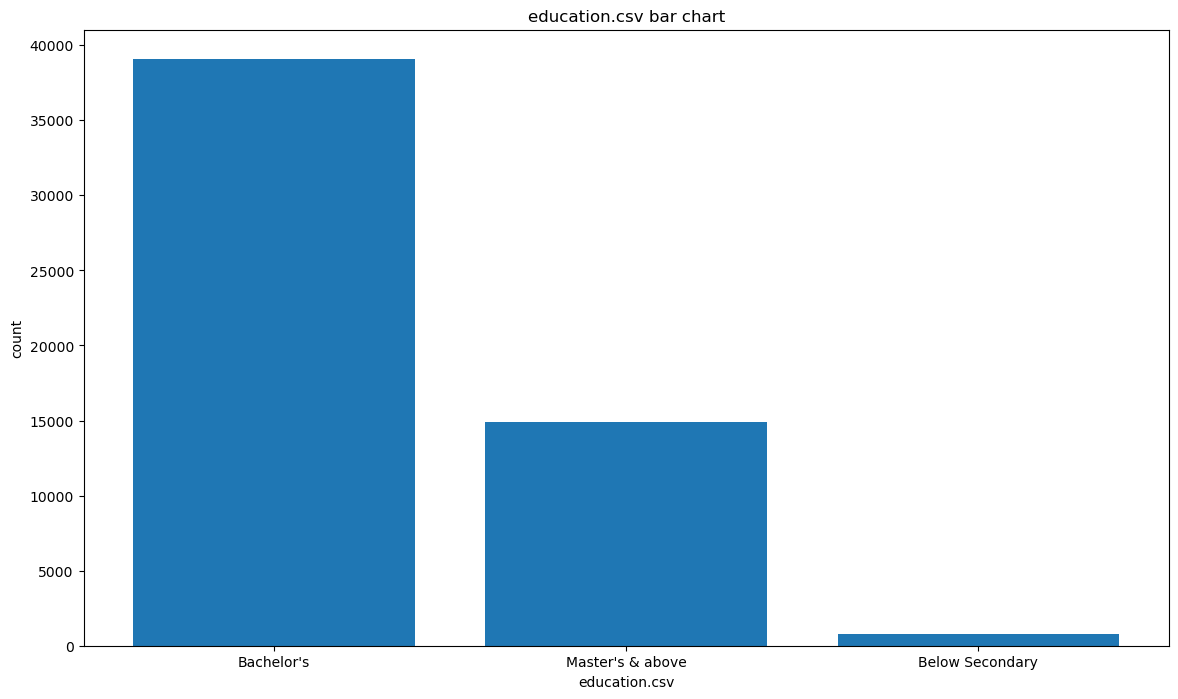

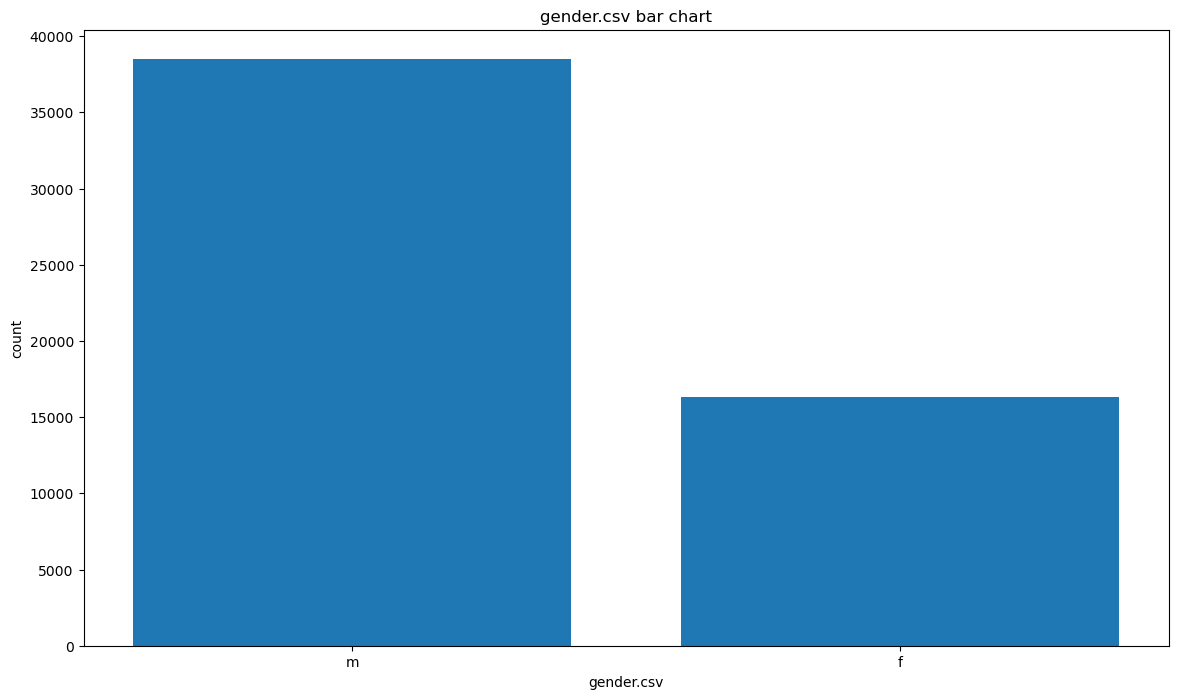

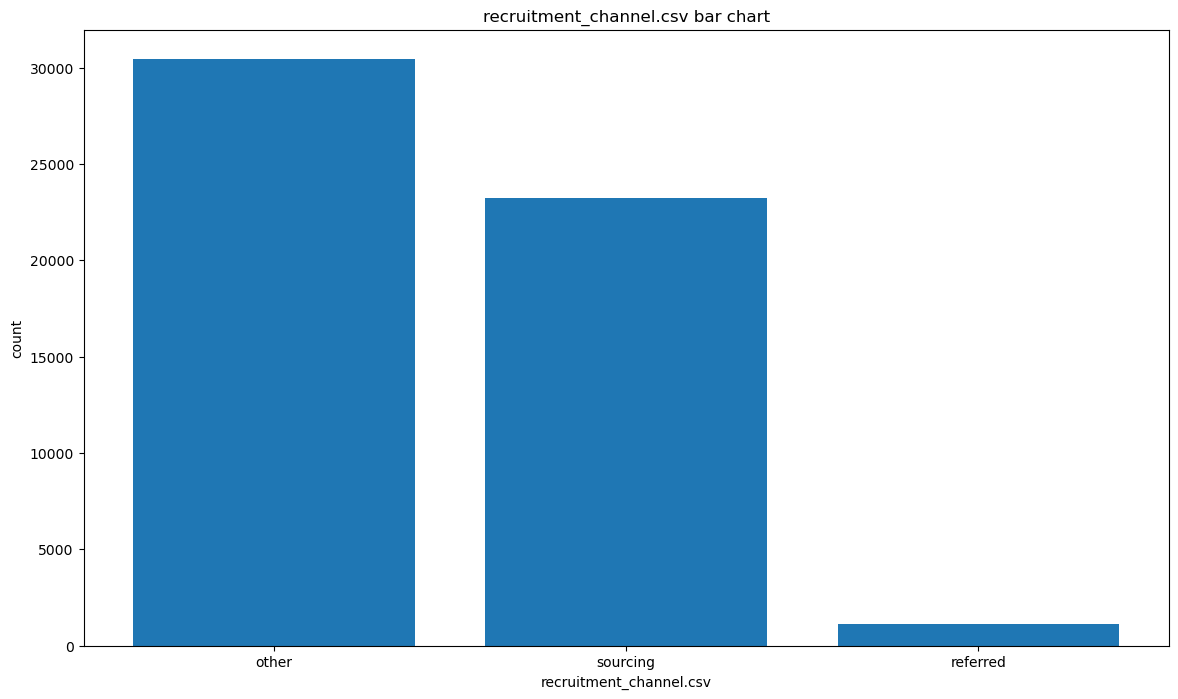

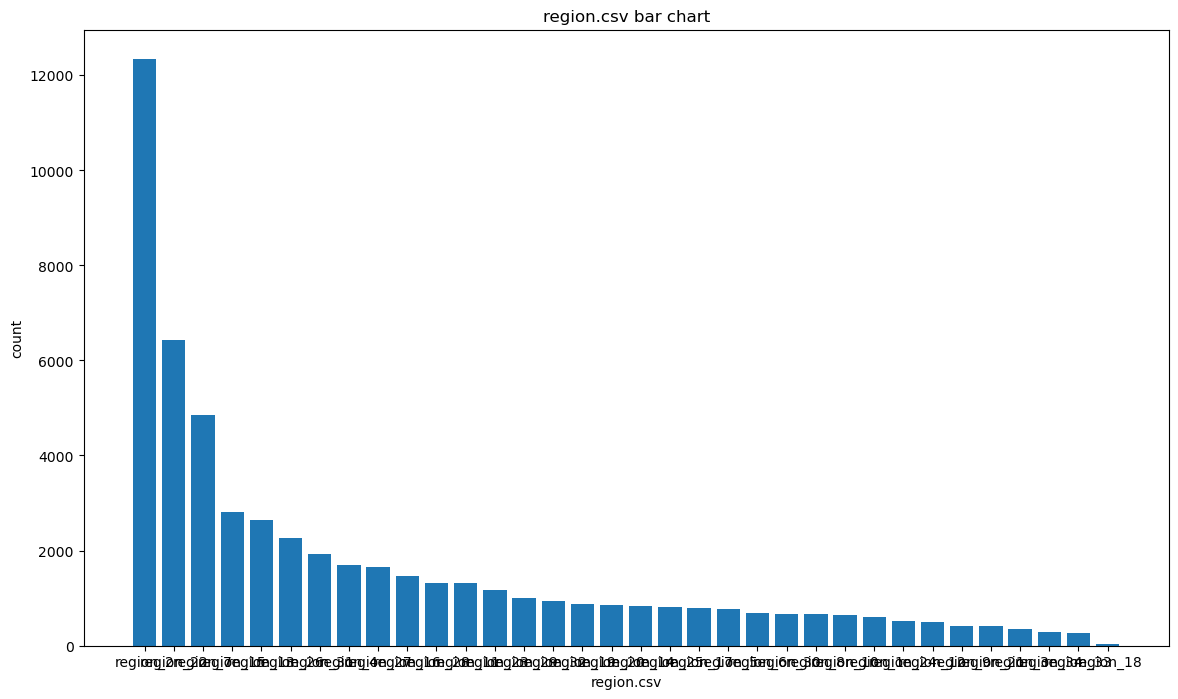

In [45]:
import matplotlib.pyplot as plt
import os
try:
    new_folder_name='hr_cat_bar'
    cat_bar_path=os.path.join(main_path,new_folder_name)
    os.makedirs(cat_bar_path)
except Exception as e:
    print(e)
cat_dfs_list=os.listdir(cat_dir_path)
for i in cat_dfs_list:
    plt.figure(figsize=(14,8))
    read_df=pd.read_csv(f'{cat_dir_path}\{i}')
    plt.bar('labels','count',data=read_df)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'{i} bar chart')
    plt.savefig(f'{cat_bar_path}\{i}.jpg')
    plt.show()

**plotting Pie chart**

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\DELL\\OneDrive\\Documents\\NareshIT\\EDA\\End-to-End EDA\\Hr data analysis\\hr_cat_pie'


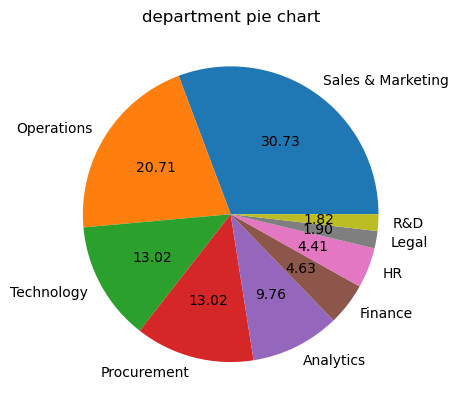

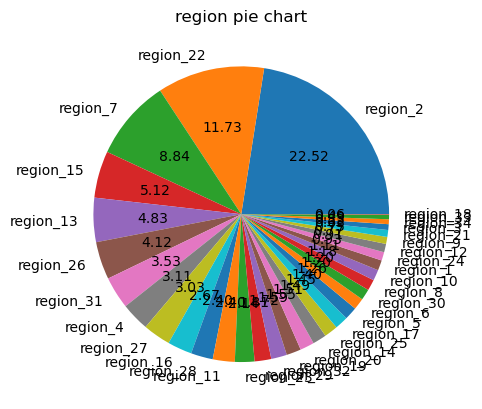

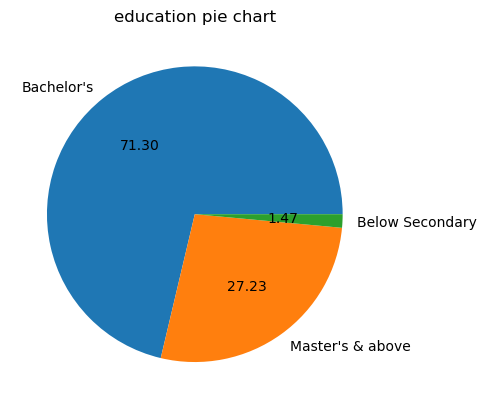

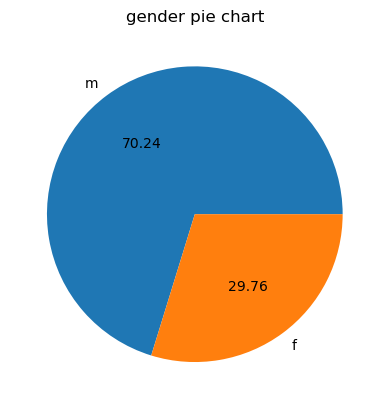

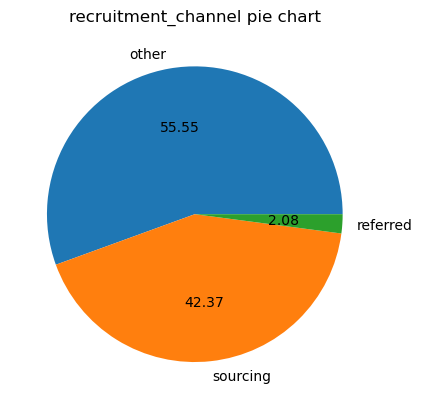

In [37]:
import matplotlib.pyplot as plt
import os
try:
    new_folder_name='hr_cat_pie'
    cat_pie_path=os.path.join(main_path,new_folder_name)
    os.makedirs(cat_pie_path)
except Exception as e:
    print(e)
for i in cat_col:
    key=hr_df[i].value_counts().keys()
    value=hr_df[i].value_counts().values
    plt.pie(x=value,labels=key,autopct='%0.2f')
    plt.title(f'{i} pie chart')
    plt.savefig(f'{cat_pie_path}\{i}.jpg')
    plt.show()

**Plotting histogram for numerical column**

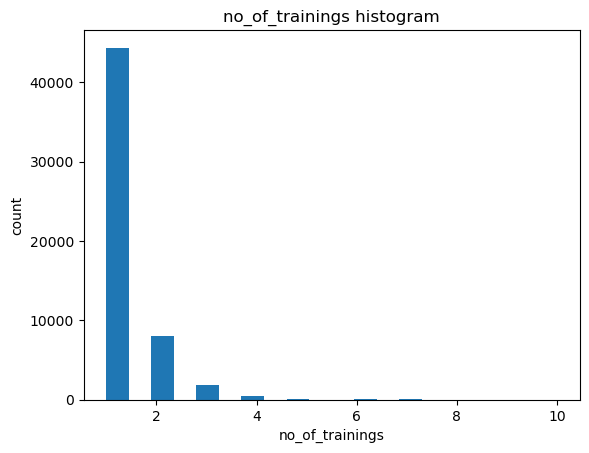

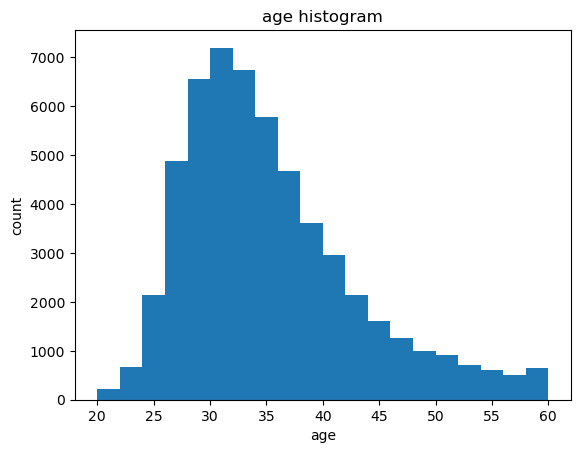

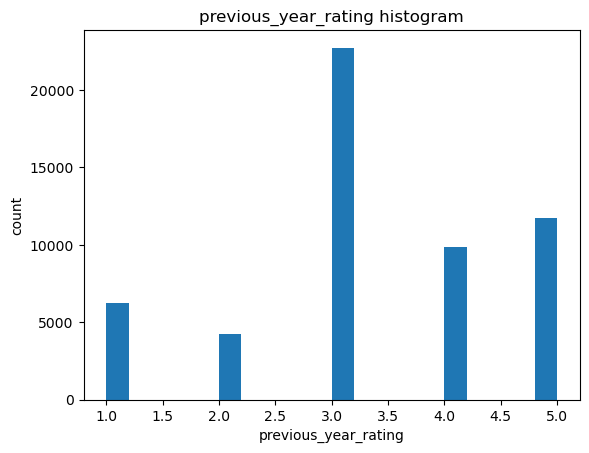

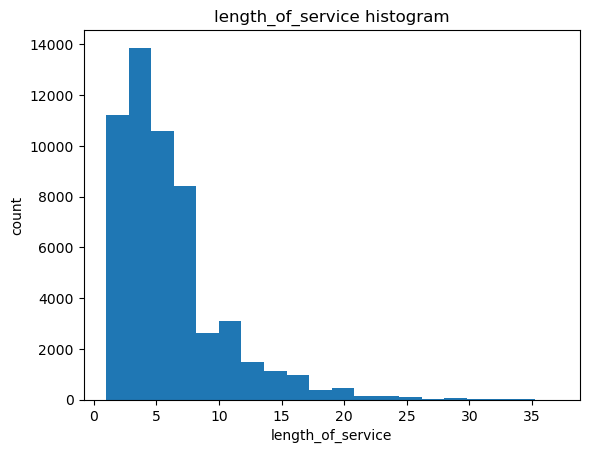

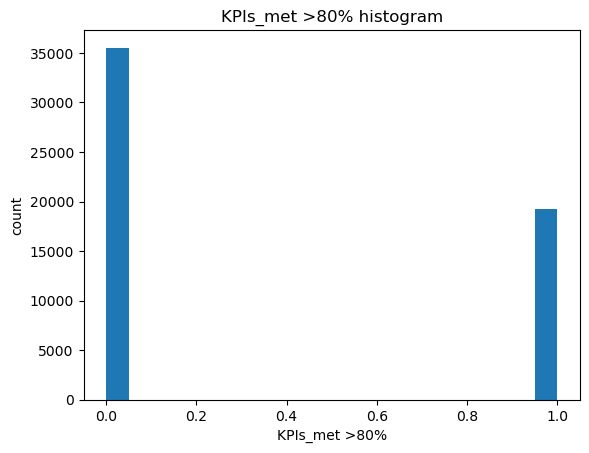

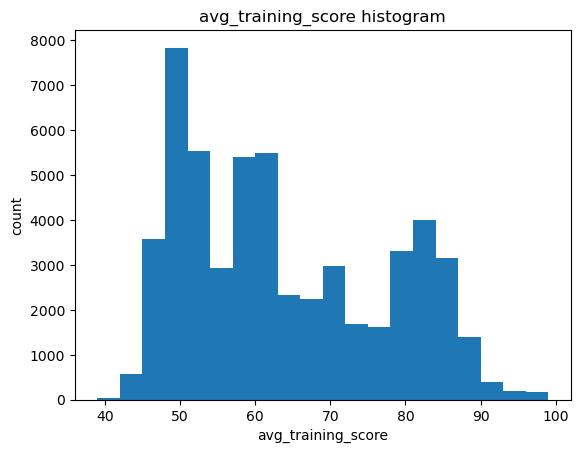

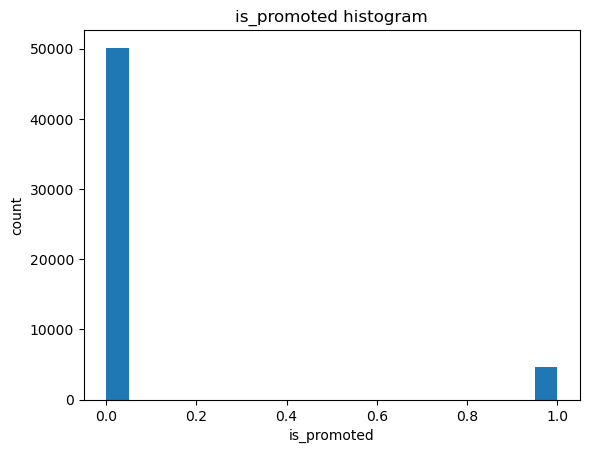

In [38]:
import matplotlib.pyplot as plt
# plotting histogram
for i in num_col:
    # interval dfs
    plt.hist(x=hr_df[i],bins=20)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'{i} histogram')
    plt.show()

**Box-plot**

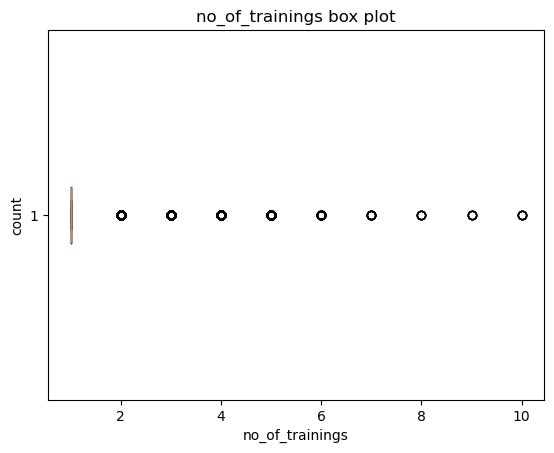

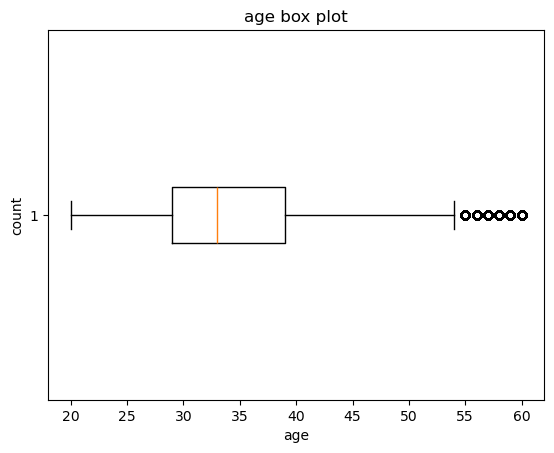

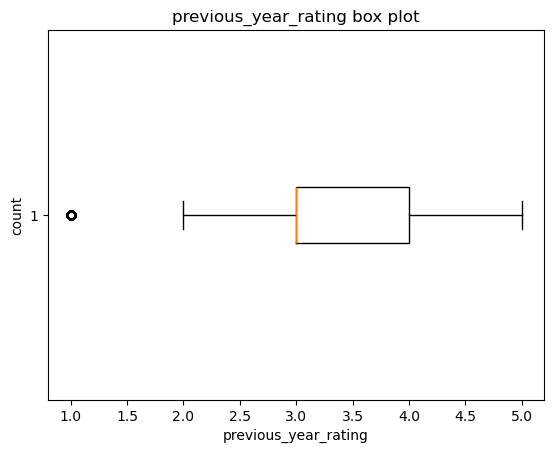

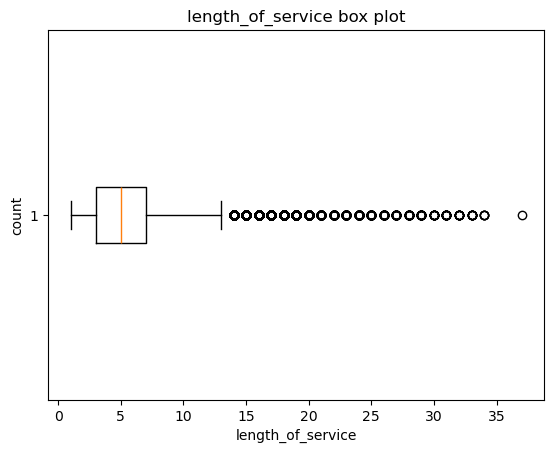

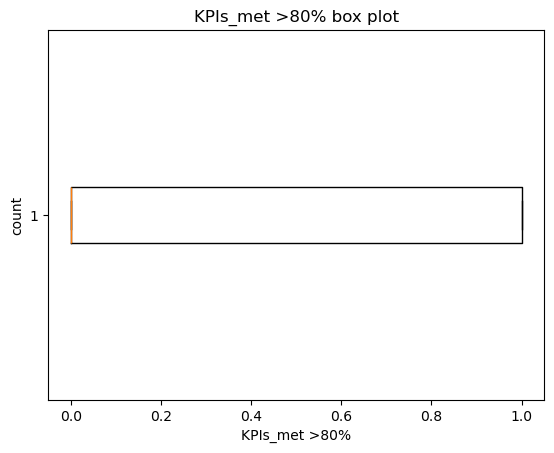

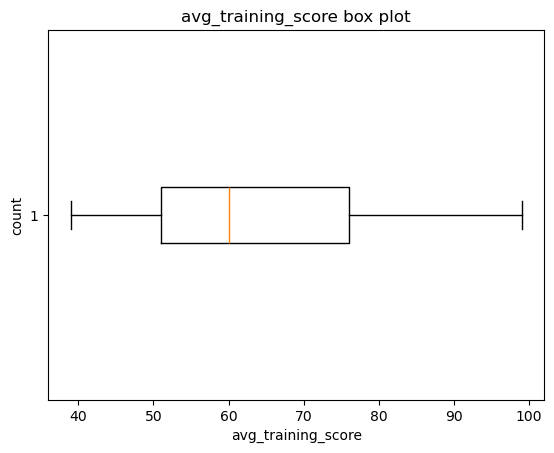

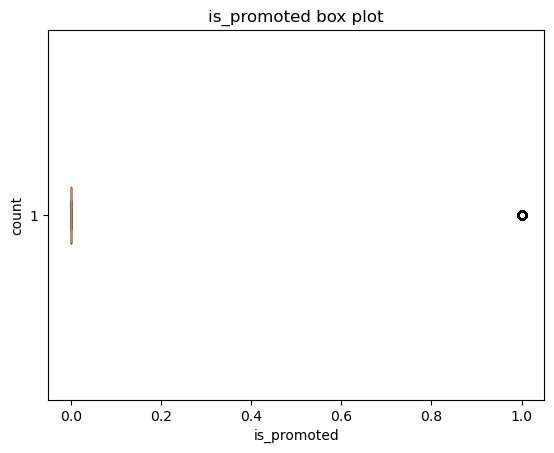

In [39]:
for i in num_col:
    plt.boxplot(x=hr_df[i],vert=False)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'{i} box plot')
    plt.show()

**Outliers**

In [40]:
for i in num_col:
    q1=np.percentile(hr_df[i],25)
    q3=np.percentile(hr_df[i],75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    con1=hr_df[i]<lb
    con2=hr_df[i]>ub
    con3=con1|con2
    outliers=hr_df[i][con3]
    print(f'{i} ({len(outliers)}) : {outliers.values}')

no_of_trainings (10430) : [2 2 2 ... 2 2 2]
age (1435) : [57 59 56 ... 57 55 59]
previous_year_rating (6223) : [1. 1. 1. ... 1. 1. 1.]
length_of_service (3489) : [16 26 17 ... 15 14 17]
KPIs_met >80% (0) : []
avg_training_score (0) : []
is_promoted (4668) : [1 1 1 ... 1 1 1]


**Replacing outliers with median**

In [41]:
for i in num_col:
    q1=np.percentile(hr_df[i],25)
    q3=np.percentile(hr_df[i],75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    con1=hr_df[i]<lb
    con2=hr_df[i]>ub
    con3=con1|con2
    outliers=hr_df[i][con3]
    outliers_list=[]
    for j in outliers:
        outliers_list.append(j)
    median=hr_df[i].median()
    median_list=[median for i in range(len(outliers_list))]
    hr_df[i].replace(outliers_list,median_list,inplace=True)
hr_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,1,39,3.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,5,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,3.0,2,0,45,0


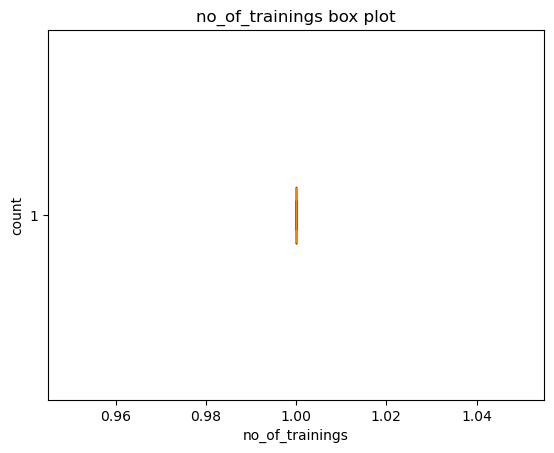

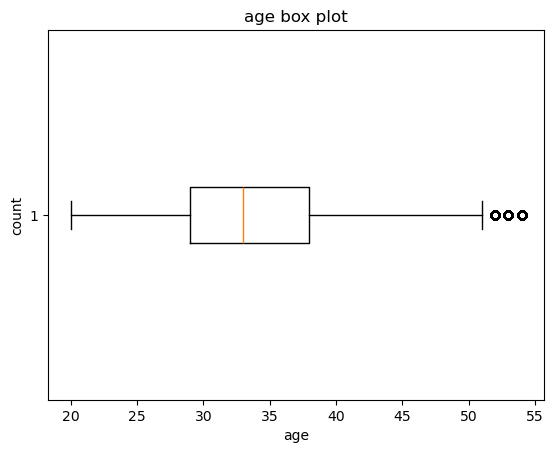

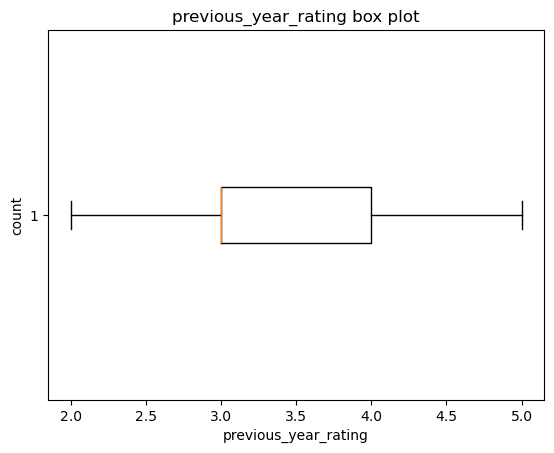

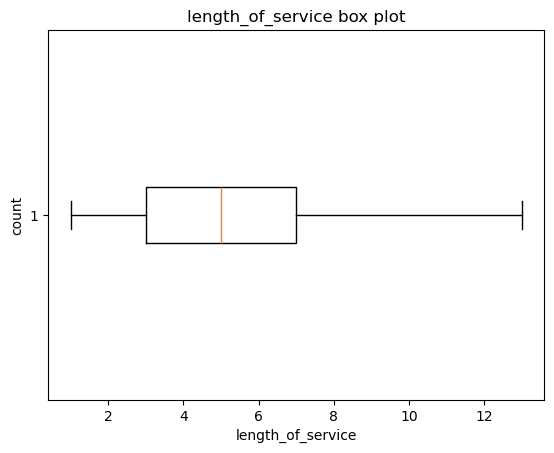

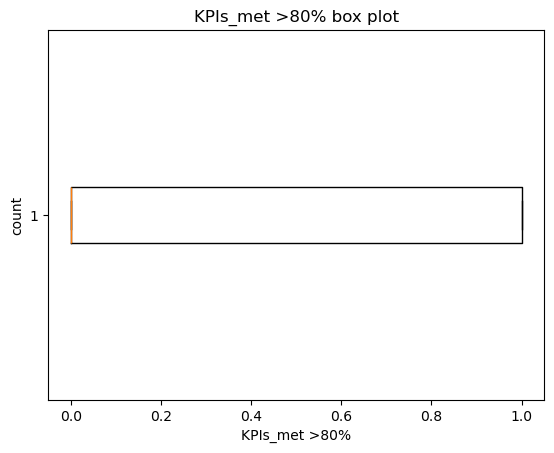

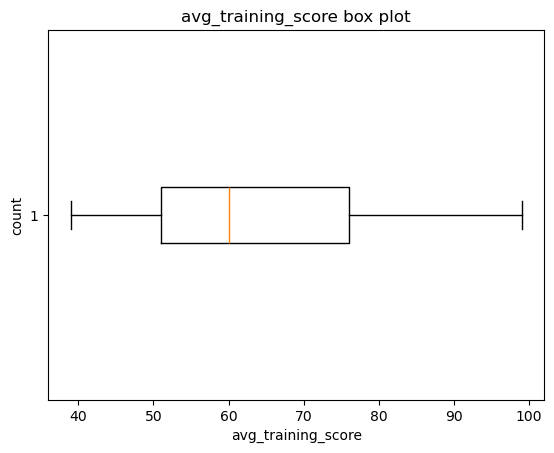

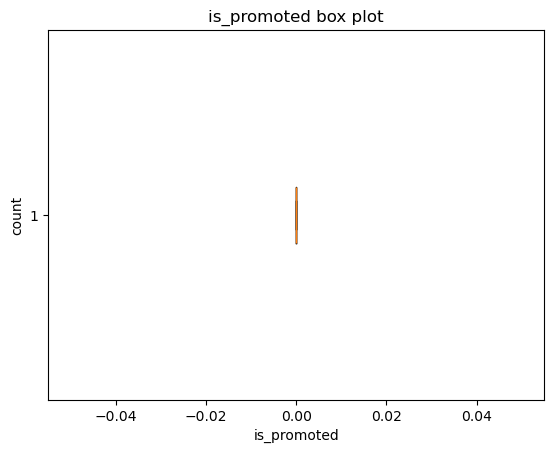

In [42]:
for i in num_col:
    plt.boxplot(x=hr_df[i],vert=False)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'{i} box plot')
    plt.show()

**Transformation**

In [43]:
num_col

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [50]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in num_col:
    hr_df[i]=pt.fit_transform(hr_df[[i]])

In [52]:
hr_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,-0.484781,0.228000,1.380524,0.762071,1.356878,-1.173748,-0.305122
1,Operations,region_22,Bachelor's,m,other,-0.484781,-0.564724,1.380524,-0.246487,-0.736986,-0.091947,-0.305122
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,-0.484781,0.087051,-0.311606,0.561785,-0.736986,-1.058971,-0.305122
3,Sales & Marketing,region_23,Bachelor's,m,other,2.053010,0.723268,-1.752567,1.101233,-0.736986,-1.058971,-0.305122
4,Technology,region_26,Bachelor's,m,other,-0.484781,1.308914,-0.311606,-1.141600,-0.736986,0.821223,-0.305122
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,-0.484781,1.549423,-0.311606,1.922634,-0.736986,1.102713,-0.305122
54804,Operations,region_27,Master's & above,f,other,-0.484781,0.488279,-1.069809,0.333625,-0.736986,-0.443726,-0.305122
54805,Analytics,region_1,Bachelor's,m,other,-0.484781,-1.171721,1.380524,-0.635348,1.356878,1.155371,-0.305122
54806,Sales & Marketing,region_9,NaN,m,sourcing,-0.484781,-0.753965,-1.752567,-1.141600,-0.736986,-1.675313,-0.305122


**Encoding**

In [53]:
map_dict={}
for i in cat_col:
    for k,j in enumerate(hr_df[i].unique(),0):
        map_dict[j]=k
    hr_df[i]=hr_df[i].map(map_dict)
hr_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,0,0,0,0,0,-0.484781,0.228000,1.380524,0.762071,1.356878,-1.173748,-0.305122
1,1,1,1,1,1,-0.484781,-0.564724,1.380524,-0.246487,-0.736986,-0.091947,-0.305122
2,0,2,1,1,0,-0.484781,0.087051,-0.311606,0.561785,-0.736986,-1.058971,-0.305122
3,0,3,1,1,1,2.053010,0.723268,-1.752567,1.101233,-0.736986,-1.058971,-0.305122
4,2,4,1,1,1,-0.484781,1.308914,-0.311606,-1.141600,-0.736986,0.821223,-0.305122
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,2,13,1,1,0,-0.484781,1.549423,-0.311606,1.922634,-0.736986,1.102713,-0.305122
54804,1,22,0,0,1,-0.484781,0.488279,-1.069809,0.333625,-0.736986,-0.443726,-0.305122
54805,3,8,1,1,1,-0.484781,-1.171721,1.380524,-0.635348,1.356878,1.155371,-0.305122
54806,0,32,2,1,0,-0.484781,-0.753965,-1.752567,-1.141600,-0.736986,-1.675313,-0.305122


**Scaling**

In [54]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
for i in num_col:
    hr_df[i]=mms.fit_transform(hr_df[[i]])
hr_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,0,0,0,0,0,0.000000,0.628001,1.000000,0.524884,1.0,0.307005,0.0
1,1,1,1,1,1,0.000000,0.484352,1.000000,0.323349,0.0,0.542128,0.0
2,0,2,1,1,0,0.000000,0.602459,0.459917,0.484862,0.0,0.331951,0.0
3,0,3,1,1,1,0.983343,0.717748,0.000000,0.592657,0.0,0.331951,0.0
4,2,4,1,1,1,0.000000,0.823872,0.459917,0.144483,0.0,0.740600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,2,13,1,1,0,0.000000,0.867455,0.459917,0.756794,0.0,0.801780,0.0
54804,1,22,0,0,1,0.000000,0.675166,0.217918,0.439270,0.0,0.465671,0.0
54805,3,8,1,1,1,0.000000,0.374359,1.000000,0.245645,1.0,0.813225,0.0
54806,0,32,2,1,0,0.000000,0.450060,0.000000,0.144483,0.0,0.197993,0.0
